In [20]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#%matplotlib widget

# Tests Boris Pusher

In [21]:
with h5py.File("../build/uniform_bz.h5", "r") as f:
    print(list(f.keys()))
    x = f["x"][:]
    vx = f["vx"][:]
    vy = f["vy"][:]
    vz = f["vz"][:]

['vx', 'vy', 'vz', 'x']


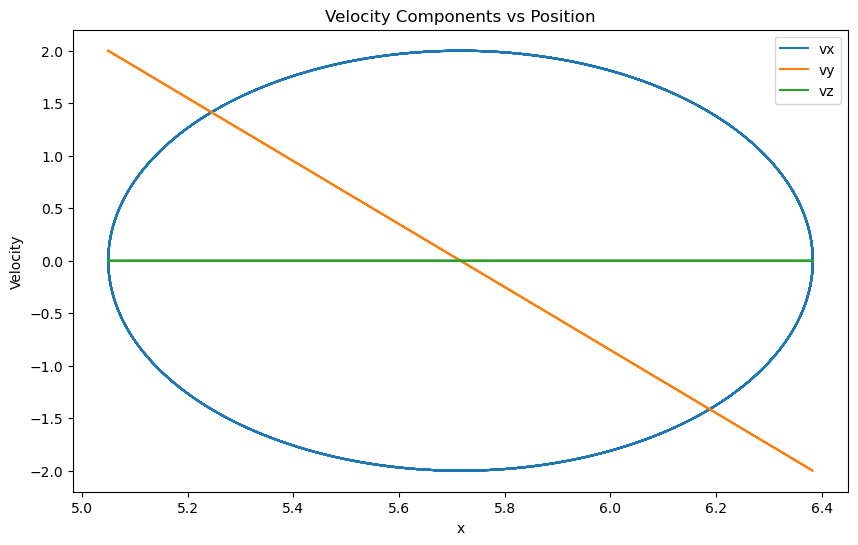

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x, vx, label='vx')
plt.plot(x, vy, label='vy')
plt.plot(x, vz, label='vz')
plt.xlabel('x')
plt.ylabel('Velocity')
plt.title('Velocity Components vs Position')
plt.legend()
plt.show()

In [23]:
with h5py.File("../build/drift_ey.h5", "r") as f:
    print(list(f.keys()))
    x = f["x"][:]
    vx = f["vx"][:]
    vy = f["vy"][:]
    vz = f["vz"][:]

['vx', 'vy', 'vz', 'x']


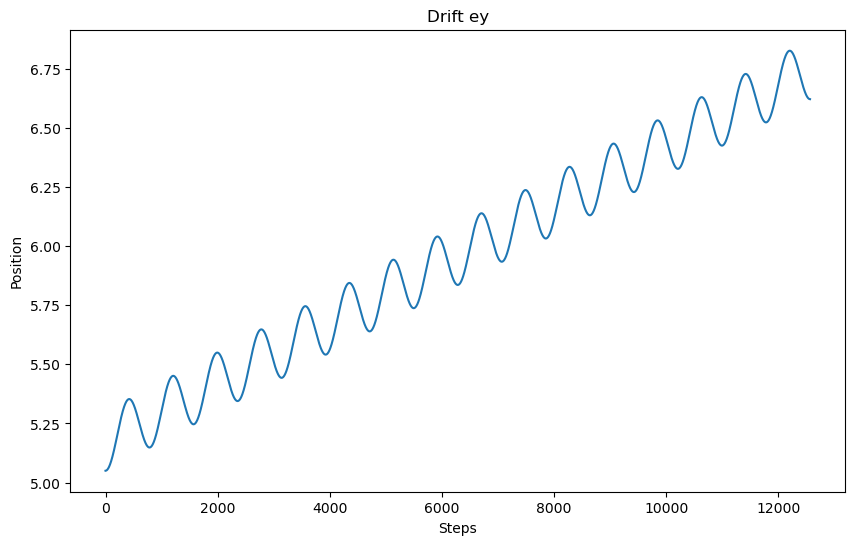

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(x)
plt.xlabel('Steps')
plt.ylabel('Position')
plt.title('Drift ey')
plt.show()  

# Test population

In [25]:
with h5py.File("../build/population.h5", "r") as f:
    print(list(f.keys()))
    N = f["density"][:]
    vx = f["vx"][:]
    vy = f["vy"][:]
    vz = f["vz"][:]

['density', 'vx', 'vy', 'vz']


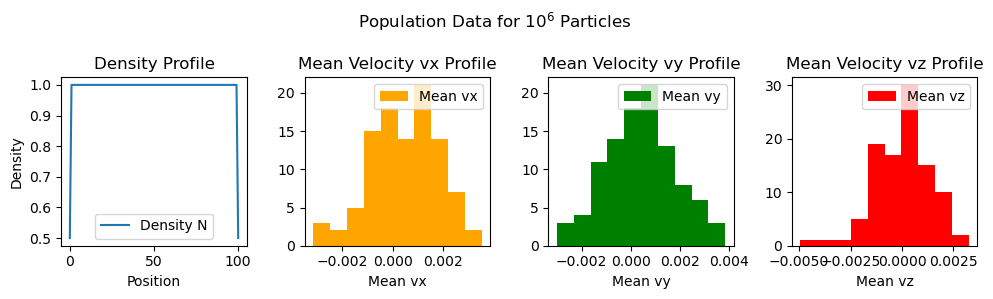

In [27]:
plt.figure(figsize=(10, 3))
plt.subplot(1 , 4, 1)
plt.plot(N, label='Density N')
plt.ylabel('Density')
plt.xlabel('Position')
plt.title('Density Profile')
plt.legend()    
plt.subplot(1, 4, 2)
plt.hist(vx, label='Mean vx', color='orange')
plt.xlabel('Mean vx')
plt.title('Mean Velocity vx Profile')
plt.legend()
plt.subplot(1, 4, 3)
plt.hist(vy, label='Mean vy', color='green')
plt.xlabel('Mean vy')
plt.title('Mean Velocity vy Profile')
plt.legend()
plt.subplot(1, 4, 4)
plt.hist(vz, label='Mean vz', color='red')
plt.xlabel('Mean vz')
plt.title('Mean Velocity vz Profile')
plt.suptitle('Population Data for $10^6$ Particles')
plt.legend()
plt.tight_layout()
plt.show()

# Test Ampere and Faraday

In [28]:
with h5py.File("../build/ampere.h5", "r") as f:
    print(list(f.keys()))
    Jx = f["Jx"][1:-1]
    Jy = f["Jy"][1:-1]
    Jz = f["Jz"][1:-1]

['Jx', 'Jy', 'Jz', 'expected_Jy', 'expected_Jz']


In [29]:
Jx.shape, Jy.shape, Jz.shape

((100,), (101,), (101,))

In [30]:
pos101 = np.arange(101)
expected_Jy = - np.cos(0.1*pos101)
expected_Jz = - np.sin(0.1*pos101)

/tmp/ipykernel_30025/3501994963.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot((Jz - expected_Jz)/expected_Jz, label='Residual Jz')


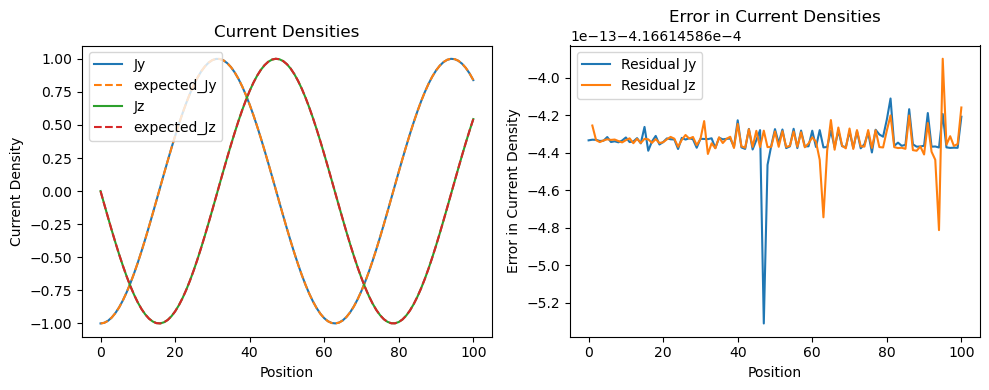

In [31]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Jy, label='Jy')
plt.plot(pos101, expected_Jy, '--', label='expected_Jy')
plt.plot(Jz, label='Jz')
plt.plot(pos101, expected_Jz, '--', label='expected_Jz')

plt.xlabel('Position')
plt.ylabel('Current Density')
plt.title('Current Densities')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot((Jy - expected_Jy)/expected_Jy, label='Residual Jy')
plt.plot((Jz - expected_Jz)/expected_Jz, label='Residual Jz')
plt.xlabel('Position')
plt.ylabel('Error in Current Density')
plt.title('Error in Current Densities')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
with h5py.File("../build/faraday.h5", "r") as f:
    print(list(f.keys()))
    Bx = f["Bnewx"][1:-1]
    By = f["Bnewy"][1:-1]
    Bz = f["Bnewz"][1:-1]
    expected_Bx = f["expected_Bx"][:]
    expected_By = f["expected_By"][:]
    expected_Bz = f["expected_Bz"][:]

['Bnewx', 'Bnewy', 'Bnewz', 'expected_Bx', 'expected_By', 'expected_Bz']


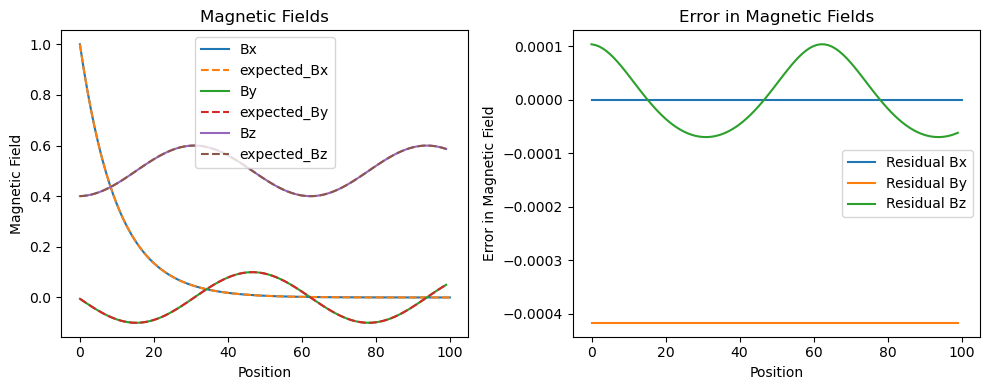

In [34]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(Bx, label='Bx')
plt.plot(expected_Bx, '--', label='expected_Bx')
plt.plot(By, label='By')
plt.plot(expected_By, '--', label='expected_By')
plt.plot(Bz, label='Bz')
plt.plot(expected_Bz, '--', label='expected_Bz')
plt.xlabel('Position')
plt.ylabel('Magnetic Field')
plt.title('Magnetic Fields')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot((Bx - expected_Bx)/expected_Bx, label='Residual Bx')
plt.plot((By - expected_By)/expected_By, label='Residual By')
plt.plot((Bz - expected_Bz)/expected_Bz, label='Residual Bz')
plt.xlabel('Position')
plt.ylabel('Error in Magnetic Field')
plt.title('Error in Magnetic Fields')
plt.legend()
plt.tight_layout()
plt.show()